# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.


## Project Scope

The objective of this project is to analyze **Marketing campaign data** across different social media platforms and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

In [ ]:
!pip install plotly

In [ ]:
!pip install dash

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import dash

## Load the data 

In [2]:
data = pd.read_csv("Social_Media_Advertising.csv")

In [3]:
data.head()

Campaign_ID Target_Audience     Campaign_Goal Duration Channel_Used  \
0       529013       Men 35-44    Product Launch  15 Days    Instagram   
1       275352     Women 45-60  Market Expansion  15 Days     Facebook   
2       692322       Men 45-60    Product Launch  15 Days    Instagram   
3       675757       Men 25-34    Increase Sales  15 Days    Pinterest   
4       535900       Men 45-60  Market Expansion  15 Days    Pinterest   

   Conversion_Rate Acquisition_Cost       ROI     Location Language  Clicks  \
0             0.15         $500.00   5.790000    Las Vegas  Spanish     500   
1             0.01         $500.00   7.210000  Los Angeles   French     500   
2             0.08         $500.00   0.430000       Austin  Spanish     500   
3             0.03         $500.00   0.909824        Miami  Spanish     293   
4             0.13         $500.00   1.422828       Austin   French     293   

   Impressions  Engagement_Score Customer_Segment       Date         Company  
0         3000                 7           Health  2/25/2022      Aura Align  
1         3000                 5             Home  5/12/2022  Hearth Harmony  
2         3000                 9       Technology  6/19/2022   Cyber Circuit  
3         1937                 1           Health   9/8/2022       Well Wish  
4         1937                 1             Home  8/24/2022  Hearth Harmony

### Shape of Data

In [4]:
data.shape

(300000, 16)

## Statistical Summary

In [5]:
data.describe()

Campaign_ID  Conversion_Rate            ROI         Clicks  \
count  300000.000000    300000.000000  300000.000000  300000.000000   
mean   550444.804487         0.080009       3.177691   18153.670370   
std    260252.586037         0.040563       2.461200   11027.023294   
min    100001.000000         0.010000       0.000000     293.000000   
25%    325003.500000         0.050000       0.930000    8821.000000   
50%    551164.500000         0.080000       2.670000   17230.000000   
75%    776284.500000         0.110000       5.330000   26808.000000   
max    999998.000000         0.150000       8.000000   40000.000000   

         Impressions  Engagement_Score  
count  300000.000000     300000.000000  
mean    56034.236387          4.369217  
std     32583.136334          3.156492  
min      1937.000000          1.000000  
25%     28362.000000          1.000000  
50%     54098.000000          4.000000  
75%     80925.250000          7.000000  
max    120000.000000         10.000000

## Table information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       300000 non-null  int64  
 1   Target_Audience   300000 non-null  object 
 2   Campaign_Goal     300000 non-null  object 
 3   Duration          300000 non-null  object 
 4   Channel_Used      300000 non-null  object 
 5   Conversion_Rate   300000 non-null  float64
 6   Acquisition_Cost  300000 non-null  object 
 7   ROI               300000 non-null  float64
 8   Location          300000 non-null  object 
 9   Language          300000 non-null  object 
 10  Clicks            300000 non-null  int64  
 11  Impressions       300000 non-null  int64  
 12  Engagement_Score  300000 non-null  int64  
 13  Customer_Segment  300000 non-null  object 
 14  Date              300000 non-null  object 
 15  Company           300000 non-null  object 
dtypes: float64(2), int64

## Data Cleaning

In [7]:
data.head(2)

Campaign_ID Target_Audience     Campaign_Goal Duration Channel_Used  \
0       529013       Men 35-44    Product Launch  15 Days    Instagram   
1       275352     Women 45-60  Market Expansion  15 Days     Facebook   

   Conversion_Rate Acquisition_Cost   ROI     Location Language  Clicks  \
0             0.15         $500.00   5.79    Las Vegas  Spanish     500   
1             0.01         $500.00   7.21  Los Angeles   French     500   

   Impressions  Engagement_Score Customer_Segment       Date         Company  
0         3000                 7           Health  2/25/2022      Aura Align  
1         3000                 5             Home  5/12/2022  Hearth Harmony

### Split Target Audience into two columns

In [8]:
data[['Gender', 'Age Group']] = data['Target_Audience'].str.split(' ', expand=True)

In [9]:
data[['Gender', 'Age Group']].head()

Gender Age Group
0    Men     35-44
1  Women     45-60
2    Men     45-60
3    Men     25-34
4    Men     45-60

In [10]:
data["Gender"].value_counts()

Gender
Women    133331
Men      133222
All       33447
Name: count, dtype: int64

In [11]:
data["Age Group"].value_counts()

Age Group
25-34    66828
18-24    66774
45-60    66605
35-44    66346
Ages     33447
Name: count, dtype: int64

In [12]:
data['Age Group'] = data['Age Group'].replace('Ages', 'All ages')

In [13]:
data['Gender'] = data['Gender'].replace('All', 'Both')

In [14]:
data.drop("Target_Audience",axis=1,inplace=True)

### Clean the duration column

In [15]:
data['Duration'] = data['Duration'].str.split(' ',expand=True)[0]

### Acquisitin Cost

In [16]:
data['Acquisition_Cost'] = data['Acquisition_Cost'].str.replace('$', '')

In [17]:
data['Acquisition_Cost'] = data['Acquisition_Cost'].str.replace(' ', '')

In [18]:
data['Acquisition_Cost'] = data['Acquisition_Cost'].str.replace(',', '')

In [19]:
data['Acquisition_Cost'] = data['Acquisition_Cost'].astype(float)

In [20]:
data.head()

Campaign_ID     Campaign_Goal Duration Channel_Used  Conversion_Rate  \
0       529013    Product Launch       15    Instagram             0.15   
1       275352  Market Expansion       15     Facebook             0.01   
2       692322    Product Launch       15    Instagram             0.08   
3       675757    Increase Sales       15    Pinterest             0.03   
4       535900  Market Expansion       15    Pinterest             0.13   

   Acquisition_Cost       ROI     Location Language  Clicks  Impressions  \
0             500.0  5.790000    Las Vegas  Spanish     500         3000   
1             500.0  7.210000  Los Angeles   French     500         3000   
2             500.0  0.430000       Austin  Spanish     500         3000   
3             500.0  0.909824        Miami  Spanish     293         1937   
4             500.0  1.422828       Austin   French     293         1937   

   Engagement_Score Customer_Segment       Date         Company Gender  \
0                 7           Health  2/25/2022      Aura Align    Men   
1                 5             Home  5/12/2022  Hearth Harmony  Women   
2                 9       Technology  6/19/2022   Cyber Circuit    Men   
3                 1           Health   9/8/2022       Well Wish    Men   
4                 1             Home  8/24/2022  Hearth Harmony    Men   

  Age Group  
0     35-44  
1     45-60  
2     45-60  
3     25-34  
4     45-60

### Date Column

In [21]:
data["Date"] = pd.to_datetime(data["Date"])

### Review the Data types

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Campaign_ID       300000 non-null  int64         
 1   Campaign_Goal     300000 non-null  object        
 2   Duration          300000 non-null  object        
 3   Channel_Used      300000 non-null  object        
 4   Conversion_Rate   300000 non-null  float64       
 5   Acquisition_Cost  300000 non-null  float64       
 6   ROI               300000 non-null  float64       
 7   Location          300000 non-null  object        
 8   Language          300000 non-null  object        
 9   Clicks            300000 non-null  int64         
 10  Impressions       300000 non-null  int64         
 11  Engagement_Score  300000 non-null  int64         
 12  Customer_Segment  300000 non-null  object        
 13  Date              300000 non-null  datetime64[ns]
 14  Comp

### Check Duplicates

In [23]:
data.duplicated().sum()

0

### Check Missing

In [24]:
data.isnull().sum()

Campaign_ID         0
Campaign_Goal       0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
Company             0
Gender              0
Age Group           0
dtype: int64

## Let's Visualize and Analyze the data

### Unique Values in each column

In [25]:
for i in data.columns:
    print(f"{i} has {data[i].nunique()} values. ")

Campaign_ID has 255092 values. 
Campaign_Goal has 4 values. 
Duration has 4 values. 
Channel_Used has 4 values. 
Conversion_Rate has 15 values. 
Acquisition_Cost has 250998 values. 
ROI has 1601 values. 
Location has 5 values. 
Language has 3 values. 
Clicks has 39698 values. 
Impressions has 115196 values. 
Engagement_Score has 10 values. 
Customer_Segment has 5 values. 
Date has 365 values. 
Company has 50 values. 
Gender has 3 values. 
Age Group has 5 values. 


### Display correlation matrix and heatmap

In [26]:
numeric_columns = data.select_dtypes(include='number')
numeric_columns.head()

Campaign_ID  Conversion_Rate  Acquisition_Cost       ROI  Clicks  \
0       529013             0.15             500.0  5.790000     500   
1       275352             0.01             500.0  7.210000     500   
2       692322             0.08             500.0  0.430000     500   
3       675757             0.03             500.0  0.909824     293   
4       535900             0.13             500.0  1.422828     293   

   Impressions  Engagement_Score  
0         3000                 7  
1         3000                 5  
2         3000                 9  
3         1937                 1  
4         1937                 1

In [27]:
correlation_matrix = numeric_columns.corr()
correlation_matrix 

Campaign_ID  Conversion_Rate  Acquisition_Cost       ROI  \
Campaign_ID          1.000000        -0.000761          0.003352  0.000485   
Conversion_Rate     -0.000761         1.000000          0.002076 -0.000249   
Acquisition_Cost     0.003352         0.002076          1.000000 -0.001659   
ROI                  0.000485        -0.000249         -0.001659  1.000000   
Clicks               0.002907         0.002046          0.925816  0.188343   
Impressions          0.002993         0.002054          0.943342  0.166009   
Engagement_Score     0.001883        -0.001994         -0.002732  0.354717   

                    Clicks  Impressions  Engagement_Score  
Campaign_ID       0.002907     0.002993          0.001883  
Conversion_Rate   0.002046     0.002054         -0.001994  
Acquisition_Cost  0.925816     0.943342         -0.002732  
ROI               0.188343     0.166009          0.354717  
Clicks            1.000000     0.998769          0.200095  
Impressions       0.998769     1.000000          0.176253  
Engagement_Score  0.200095     0.176253          1.000000

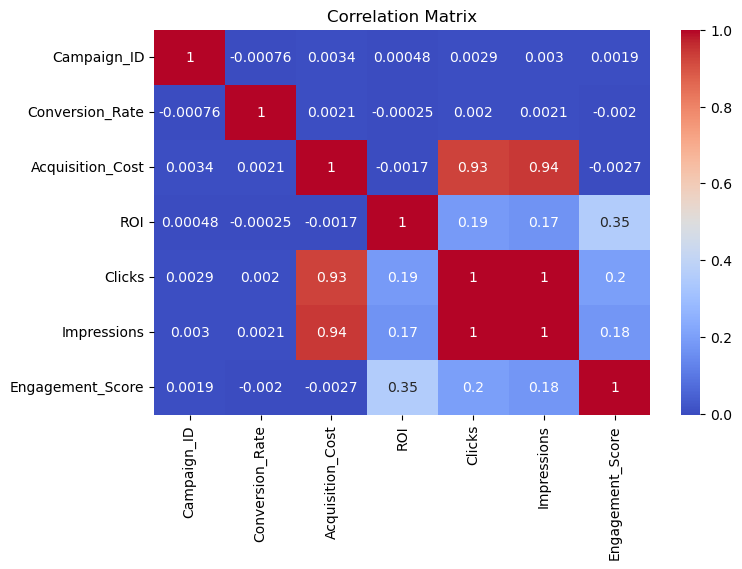

In [28]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Distribution plots for numerical columns

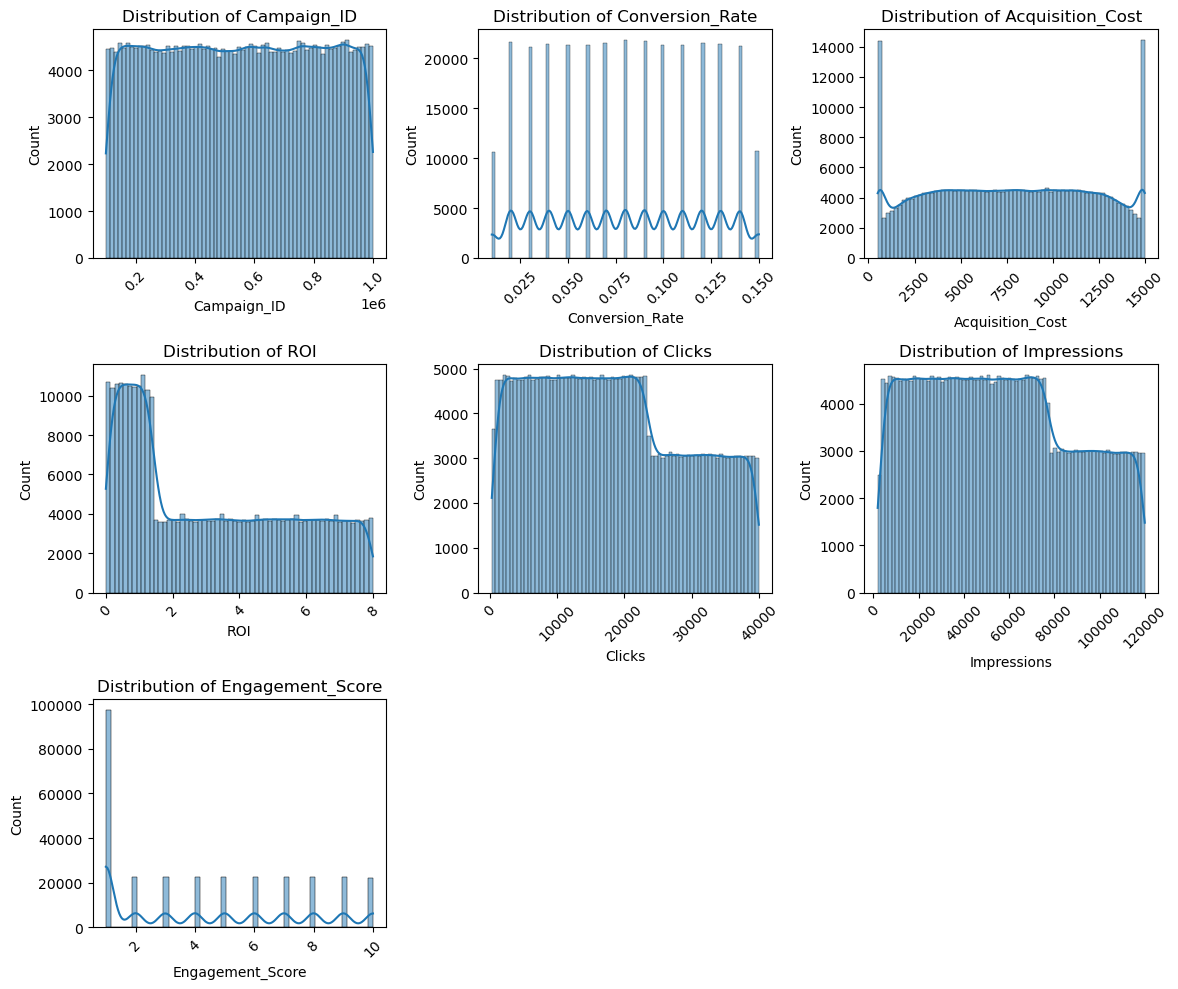

In [29]:
numerical_columns = data.select_dtypes(include=np.number).columns

plt.figure(figsize=(12, 10))

# Iterate through each channel and plot on a separate subplot
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[column], kde=True)    
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [32]:
from ydata_profiling import ProfileReport

In [33]:
profile = ProfileReport(data, title="Profiling Report")

In [34]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#profile.to_file("Social Media Marketing.html")

### Overall Campaign Performance

**a. Overall performance by campaign**

In [35]:
overall_performance = data.groupby('Campaign_Goal').agg({
    'Conversion_Rate': 'mean',
    'Acquisition_Cost': 'mean',
    'ROI': 'mean'
}).reset_index()

overall_performance

Campaign_Goal  Conversion_Rate  Acquisition_Cost       ROI
0   Brand Awareness         0.079995       7774.537989  3.172684
1    Increase Sales         0.079929       7746.637409  3.178511
2  Market Expansion         0.080220       7734.555637  3.169549
3    Product Launch         0.079894       7759.136071  3.190008

**b. Highest and Lowest Engagement Scores**

In [36]:
# Categorize the engagement scores into three groups
bins = [0, 3, 7, 10] 
labels = ['Lowest', 'In-Between', 'Highest']
data['Engagement_Category'] = pd.cut(data['Engagement_Score'], bins=bins, labels=labels, right=False)


In [37]:
# Count the number of campaigns in each category
category_counts = data['Engagement_Category'].value_counts().sort_index()

In [38]:
category_counts

Engagement_Category
Lowest        120237
In-Between     89966
Highest        67570
Name: count, dtype: int64

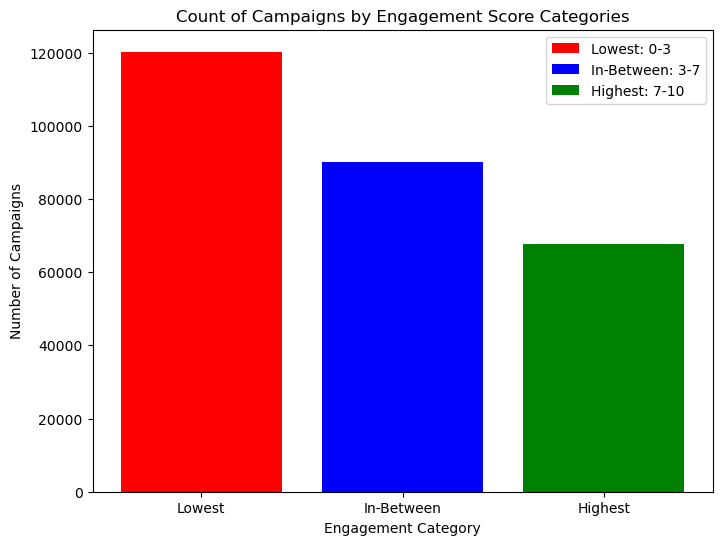

In [39]:
plt.figure(figsize=(8, 6))
bars = plt.bar(category_counts.index, category_counts.values, color=['red', 'blue', 'green'])

plt.xlabel('Engagement Category')
plt.ylabel('Number of Campaigns')
plt.title('Count of Campaigns by Engagement Score Categories')

# Adding a custom legend
legend_labels = ['Lowest: 0-3', 'In-Between: 3-7', 'Highest: 7-10']
plt.legend(bars, legend_labels)

plt.show()

### 2. Target Audience Analysis


**a. Performance Across Different Target Audiences**

In [40]:
target_audience_performance = data.groupby(['Gender']).agg({
    'Conversion_Rate': 'mean',
    'Acquisition_Cost': 'mean',
    'ROI': 'mean'
}).reset_index()

target_audience_performance

Gender  Conversion_Rate  Acquisition_Cost       ROI
0   Both         0.080197       7742.674657  3.211133
1    Men         0.080040       7754.613622  3.170991
2  Women         0.079932       7755.667202  3.175997

In [41]:
target_audience_performance = data.groupby(['Age Group']).agg({
    'Conversion_Rate': 'mean',
    'Acquisition_Cost': 'mean',
    'ROI': 'mean'
}).reset_index()

target_audience_performance

Age Group  Conversion_Rate  Acquisition_Cost       ROI
0     18-24         0.080105       7776.915483  3.179218
1     25-34         0.079825       7739.943333  3.168237
2     35-44         0.080057       7756.184997  3.169031
3     45-60         0.079957       7747.518391  3.177481
4  All ages         0.080197       7742.674657  3.211133

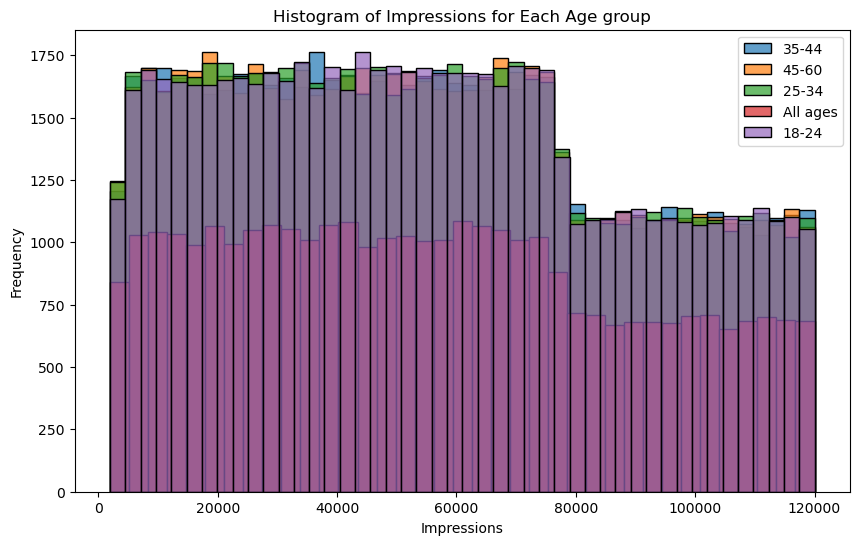

In [42]:
plt.figure(figsize=(10, 6))
for group in data['Age Group'].unique():
    sns.histplot(data[data['Age Group'] == group]['Impressions'], label=group, kde=False, alpha=0.7)

plt.title('Histogram of Impressions for Each Age group')
plt.xlabel('Impressions')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Channel Effectiveness


**a. Highest Engagement and Conversion Rates by Channel**

In [43]:
channel_performance = data.groupby('Channel_Used').agg({
    'Engagement_Score': 'mean',
    'Conversion_Rate': 'mean'
}).reset_index()

channel_performance

Channel_Used  Engagement_Score  Conversion_Rate
0     Facebook          5.478394         0.079870
1    Instagram          5.507650         0.079764
2    Pinterest          1.000000         0.080042
3      Twitter          5.495760         0.080363

<Figure size 1200x600 with 0 Axes>

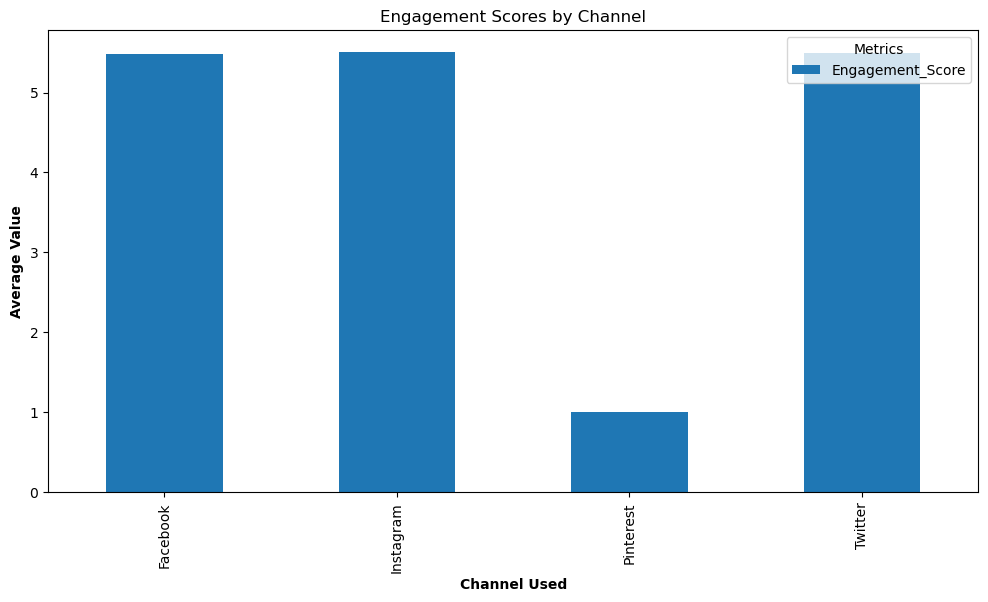

In [44]:
# Plotting highest engagement and conversion rates by channel
plt.figure(figsize=(12, 6))
channel_performance.plot(kind='bar', x='Channel_Used', y=['Engagement_Score'], figsize=(12, 6))

plt.xlabel('Channel Used', fontweight='bold')
plt.ylabel('Average Value', fontweight='bold')
plt.title('Engagement Scores by Channel')
plt.legend(title='Metrics')
plt.show()


**b. Cost Per Acquisition by Channel**

In [45]:
cpa_by_channel = data.groupby('Channel_Used').agg({
    'Acquisition_Cost': 'mean'
}).reset_index()

cpa_by_channel

Channel_Used  Acquisition_Cost
0     Facebook       7745.022816
1    Instagram       7726.252813
2    Pinterest       7769.738763
3      Twitter       7774.121680

**c. ROI Comparison by Channel**

In [46]:
roi_by_channel = data.groupby('Channel_Used').agg({
    'ROI': 'mean'
}).reset_index()

roi_by_channel

Channel_Used       ROI
0     Facebook  3.986930
1    Instagram  4.008786
2    Pinterest  0.716431
3      Twitter  4.002236

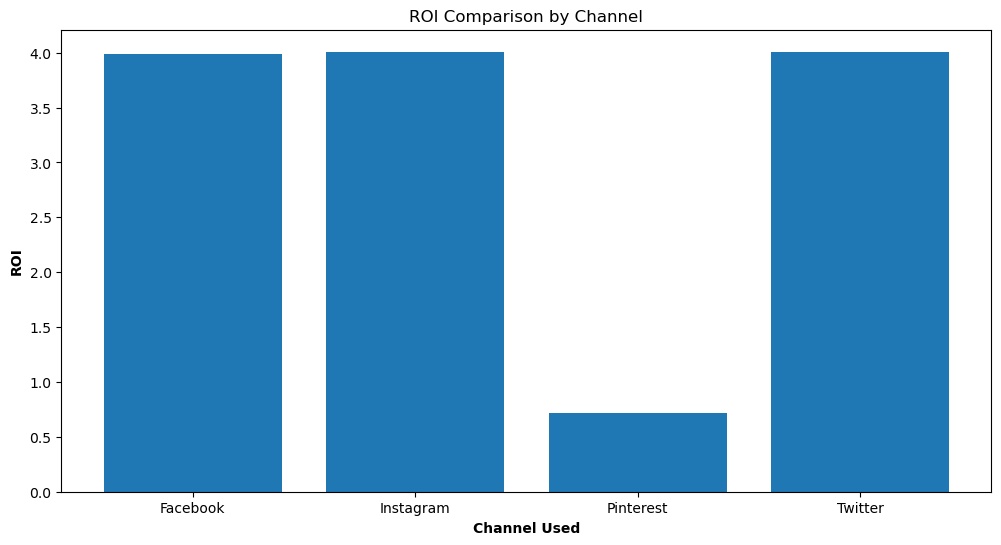

In [47]:
# Plotting ROI comparison by channel
plt.figure(figsize=(12, 6))
plt.bar(roi_by_channel['Channel_Used'], roi_by_channel['ROI'])

plt.xlabel('Channel Used', fontweight='bold')
plt.ylabel('ROI', fontweight='bold')
plt.title('ROI Comparison by Channel')
plt.show()


### Geographical Insights

**a. Highest Engagement and Conversion Rates by Location**

In [48]:
location_performance = data.groupby('Location').agg({
    'Engagement_Score': 'mean',
    'Conversion_Rate': 'mean'
}).reset_index()

location_performance

Location  Engagement_Score  Conversion_Rate
0       Austin          4.350933         0.079890
1    Las Vegas          4.366321         0.079914
2  Los Angeles          4.384288         0.080346
3        Miami          4.369101         0.079848
4     New York          4.375315         0.080047

**b. Performance by Campaign Goal and Region**

In [49]:
campaign_region_performance = data.groupby(['Location', 'Campaign_Goal']).agg({
    'Engagement_Score': 'mean',
    'Conversion_Rate': 'mean'
}).reset_index()

campaign_region_performance

Location     Campaign_Goal  Engagement_Score  Conversion_Rate
0        Austin   Brand Awareness          4.315016         0.079994
1        Austin    Increase Sales          4.359035         0.079782
2        Austin  Market Expansion          4.336300         0.080086
3        Austin    Product Launch          4.393759         0.079699
4     Las Vegas   Brand Awareness          4.322210         0.079875
5     Las Vegas    Increase Sales          4.378417         0.079513
6     Las Vegas  Market Expansion          4.401731         0.079976
7     Las Vegas    Product Launch          4.362900         0.080295
8   Los Angeles   Brand Awareness          4.400400         0.080600
9   Los Angeles    Increase Sales          4.328754         0.080353
10  Los Angeles  Market Expansion          4.417331         0.080467
11  Los Angeles    Product Launch          4.391519         0.079970
12        Miami   Brand Awareness          4.349795         0.079518
13        Miami    Increase Sales          4.408510         0.079800
14        Miami  Market Expansion          4.356483         0.080456
15        Miami    Product Launch          4.361246         0.079622
16     New York   Brand Awareness          4.398890         0.079995
17     New York    Increase Sales          4.395240         0.080187
18     New York  Market Expansion          4.348693         0.080119
19     New York    Product Launch          4.358483         0.079890

### Temporal Analysis


**a. Performance Over Time**

In [50]:
data['Date'] = pd.to_datetime(data['Date'])
data['month'] = data['Date'].dt.to_period('M')

monthly_performance = data.groupby('month').agg({
    'Engagement_Score': 'mean',
    'Conversion_Rate': 'mean',
    'ROI': 'mean'
}).reset_index()

monthly_performance

month  Engagement_Score  Conversion_Rate       ROI
0   2022-01          4.351949         0.080250  3.161775
1   2022-02          4.366471         0.079530  3.149323
2   2022-03          4.375879         0.080115  3.189672
3   2022-04          4.401442         0.080015  3.209530
4   2022-05          4.355747         0.080360  3.178557
5   2022-06          4.351647         0.079547  3.179482
6   2022-07          4.357210         0.080234  3.180516
7   2022-08          4.365044         0.080118  3.156830
8   2022-09          4.385703         0.079651  3.183658
9   2022-10          4.360937         0.080207  3.174560
10  2022-11          4.383732         0.080121  3.179695
11  2022-12          4.376304         0.079904  3.187605

**b. Seasonal Trends Impact**

In [51]:
data['quarter'] = data['Date'].dt.to_period('Q')

quarterly_performance = data.groupby('quarter').agg({
    'Engagement_Score': 'mean',
    'Conversion_Rate': 'mean',
    'ROI': 'mean'
}).reset_index()

quarterly_performance

quarter  Engagement_Score  Conversion_Rate       ROI
0  2022Q1          4.364742         0.079978  3.167472
1  2022Q2          4.369431         0.079977  3.189061
2  2022Q3          4.369107         0.080005  3.173593
3  2022Q4          4.373522         0.080077  3.180632

**c. Time Periods with Highest Engagement and Conversion Rates**

In [52]:
peak_performance = monthly_performance[
    (monthly_performance['Engagement_Score'] == monthly_performance['Engagement_Score'].max()) |
    (monthly_performance['Conversion_Rate'] == monthly_performance['Conversion_Rate'].max())
]

peak_performance


month  Engagement_Score  Conversion_Rate       ROI
3  2022-04          4.401442         0.080015  3.209530
4  2022-05          4.355747         0.080360  3.178557

### Language and Cultural Impact


**a. Performance by Language**

In [53]:
language_performance = data.groupby('Language').agg({
    'Engagement_Score': 'mean',
    'Conversion_Rate': 'mean',
    'ROI': 'mean'
}).reset_index()

language_performance

Language  Engagement_Score  Conversion_Rate       ROI
0  English          4.376873         0.079947  3.165072
1   French          4.364107         0.079990  3.178000
2  Spanish          4.366653         0.080091  3.190009

**b. Languages Yielding Higher ROI**

In [54]:
highest_roi_language = language_performance[
    language_performance['ROI'] == language_performance['ROI'].max()
]

highest_roi_language

Language  Engagement_Score  Conversion_Rate       ROI
2  Spanish          4.366653         0.080091  3.190009

**c. Language Impact on Cost Per Acquisition**

In [55]:
cpa_by_language = data.groupby('Language').agg({
    'Acquisition_Cost': 'mean'
}).reset_index()

cpa_by_language

Language  Acquisition_Cost
0  English       7778.402606
1   French       7733.705610
2  Spanish       7749.081562

### Campaign Goals and Outcomes


**a. Success of Different Campaign Goals**

In [56]:
goal_performance = data.groupby('Campaign_Goal').agg({
    'Engagement_Score': 'mean',
    'Conversion_Rate': 'mean',
    'ROI': 'mean'
}).reset_index()

goal_performance

Campaign_Goal  Engagement_Score  Conversion_Rate       ROI
0   Brand Awareness          4.357126         0.079995  3.172684
1    Increase Sales          4.373944         0.079929  3.178511
2  Market Expansion          4.372223         0.080220  3.169549
3    Product Launch          4.373624         0.079894  3.190008

**b. ROI Comparison by Campaign Goals**

In [57]:
roi_by_goal = goal_performance.sort_values(by='ROI', ascending=False)
roi_by_goal

Campaign_Goal  Engagement_Score  Conversion_Rate       ROI
3    Product Launch          4.373624         0.079894  3.190008
1    Increase Sales          4.373944         0.079929  3.178511
0   Brand Awareness          4.357126         0.079995  3.172684
2  Market Expansion          4.372223         0.080220  3.169549

**c. Campaign Goals with Highest Customer Acquisition Cost**

In [58]:
highest_acquisition_cost_goal = data.groupby('Campaign_Goal').agg({
    'Acquisition_Cost': 'mean'
}).reset_index().sort_values(by='Acquisition_Cost', ascending=False)

highest_acquisition_cost_goal

Campaign_Goal  Acquisition_Cost
0   Brand Awareness       7774.537989
3    Product Launch       7759.136071
1    Increase Sales       7746.637409
2  Market Expansion       7734.555637

### Company Performance


**a. Campaign Performance by Company**

In [59]:
company_performance = data.groupby('Company').agg({
    'Engagement_Score': 'mean',
    'Conversion_Rate': 'mean',
    'ROI': 'mean'
}).reset_index()

company_performance

Company  Engagement_Score  Conversion_Rate       ROI
0     Attire Artistry          4.428548         0.081355  3.227863
1          Aura Align          4.400329         0.080205  3.196950
2        Balance Beam          4.403537         0.079744  3.227681
3        Bistro Bliss          4.315711         0.081071  3.155654
4        Chic Couture          4.373718         0.079600  3.150072
5       Code Crafters          4.309862         0.079621  3.212720
6        Cozy Corners          4.362997         0.080472  3.191609
7      Culinary Quest          4.486257         0.080203  3.202459
8       Cyber Circuit          4.356740         0.079934  3.212299
9        Decor Dreams          4.348037         0.079798  3.189329
10        Dine Divine          4.351280         0.080046  3.097547
11     Domestic Dream          4.345994         0.079579  3.137575
12      Dwell Delight          4.347131         0.079870  3.160751
13     Elixir Essence          4.364448         0.079951  3.178907
14     Epicurean Edge          4.317770         0.080336  3.140385
15      Feast Flavors          4.409546         0.079164  3.170192
16      Fiber Fashion          4.332889         0.080748  3.173637
17      Fitness Front          4.378692         0.079341  3.198428
18       Furnish Fine          4.271603         0.079979  3.120845
19      Gadget Giants          4.363065         0.079477  3.190797
20   Gastronomy Guild          4.391448         0.078963  3.165450
21         Giga Geeks          4.420553         0.079785  3.171405
22      Glam Garments          4.378848         0.079927  3.195964
23      Gourmet Grove          4.361652         0.080254  3.181601
24           Heal Hub          4.420451         0.081171  3.169955
25     Hearth Harmony          4.358307         0.079704  3.209555
26       Homely Haven          4.376180         0.079824  3.180601
27  Innovate Infinity          4.311470         0.080236  3.181764
28        Living Luxe          4.369120         0.080034  3.197367
29         Mode Maven          4.391456         0.079394  3.127770
30          Nest Neat          4.368054         0.080581  3.121323
31       NexGen Nerds          4.338818         0.081105  3.182514
32       Nosh Nirvana          4.328988         0.080292  3.204606
33    Palate Paradise          4.326169         0.079355  3.138802
34     Pixel Pioneers          4.434516         0.079505  3.201778
35        Pulse Point          4.344243         0.079683  3.163469
36     Quantum Quirks          4.396613         0.079463  3.186070
37      Runway Rebels          4.418707         0.079951  3.170376
38       Savor Street          4.358497         0.079468  3.171924
39       Silicon Saga          4.344937         0.080386  3.192010
40       Silk & Style          4.371405         0.079923  3.137830
41       Space Spruce          4.342466         0.080612  3.188228
42       Style Sphere          4.424036         0.080846  3.234567
43        Tech Titans          4.412422         0.080997  3.191971
44      Trend Tailors          4.315685         0.080081  3.198463
45       Vigor Valley          4.301049         0.079397  3.169296
46        Vital Vigor          4.404377         0.079199  3.209699
47      Vogue Visions          4.355112         0.079147  3.160556
48          Well Wish          4.375553         0.080355  3.149003
49     Wellness Waves          4.453741         0.080336  3.194849

**b. Companies with Highest ROI and Conversion Rates**

In [60]:
highest_roi_company = company_performance[
    company_performance['ROI'] == company_performance['ROI'].max()
]

highest_conversion_company = company_performance[
    company_performance['Conversion_Rate'] == company_performance['Conversion_Rate'].max()
]

In [61]:
highest_roi_company

Company  Engagement_Score  Conversion_Rate       ROI
42  Style Sphere          4.424036         0.080846  3.234567

In [62]:
highest_conversion_company

Company  Engagement_Score  Conversion_Rate       ROI
0  Attire Artistry          4.428548         0.081355  3.227863

**c. Consistently Top-Performing Companies**

In [63]:
top_companies = company_performance[
    (company_performance['Engagement_Score'] > company_performance['Engagement_Score'].mean()) &
    (company_performance['Conversion_Rate'] > company_performance['Conversion_Rate'].mean()) &
    (company_performance['ROI'] > company_performance['ROI'].mean())
]

top_companies

Company  Engagement_Score  Conversion_Rate       ROI
0   Attire Artistry          4.428548         0.081355  3.227863
1        Aura Align          4.400329         0.080205  3.196950
7    Culinary Quest          4.486257         0.080203  3.202459
42     Style Sphere          4.424036         0.080846  3.234567
43      Tech Titans          4.412422         0.080997  3.191971
49   Wellness Waves          4.453741         0.080336  3.194849

### Top-Performing Campaigns


**a. Common Characteristics of Top-Performing Campaigns**

In [64]:
top_campaigns = data[
    (data['Engagement_Score'] > data['Engagement_Score'].quantile(0.9)) &
    (data['Conversion_Rate'] > data['Conversion_Rate'].quantile(0.9))
]

common_characteristics = round(top_campaigns.describe())

common_characteristics

Campaign_ID  Conversion_Rate  Acquisition_Cost    ROI   Clicks  \
count        795.0            795.0             795.0  795.0    795.0   
mean      562341.0              0.0            7743.0    4.0  20210.0   
min       103458.0              0.0             500.0    0.0    508.0   
25%       335900.0              0.0            4051.0    2.0  10178.0   
50%       568668.0              0.0            7589.0    4.0  19788.0   
75%       780418.0              0.0           11387.0    6.0  30131.0   
max       998743.0              0.0           15000.0    8.0  39969.0   
std       261973.0              0.0            4358.0    2.0  11546.0   

       Impressions  Engagement_Score                           Date  
count        795.0             795.0                            795  
mean       61384.0              10.0  2022-07-04 18:39:23.773584896  
min         3025.0              10.0            2022-01-01 00:00:00  
25%        31668.0              10.0            2022-04-04 00:00:00  
50%        60132.0              10.0            2022-07-03 00:00:00  
75%        90769.0              10.0            2022-10-04 00:00:00  
max       119909.0              10.0            2022-12-31 00:00:00  
std        34201.0               0.0                            NaN

**b. Consistently High-Performing Campaigns**

In [65]:
consistent_top_campaigns = data[
    (data['Engagement_Score'] > data['Engagement_Score'].mean()) &
    (data['Conversion_Rate'] > data['Conversion_Rate'].mean()) &
    (data['ROI'] > data['ROI'].mean())
]

consistent_top_campaigns

Campaign_ID     Campaign_Goal Duration Channel_Used  Conversion_Rate  \
0            529013    Product Launch       15    Instagram             0.15   
36           265261  Market Expansion       15    Instagram             0.11   
39           286444  Market Expansion       15    Instagram             0.15   
43           617513   Brand Awareness       15     Facebook             0.10   
54           431414    Increase Sales       15    Instagram             0.11   
...             ...               ...      ...          ...              ...   
299943       480965    Product Launch       60    Instagram             0.13   
299967       352570   Brand Awareness       60    Instagram             0.12   
299977       223569  Market Expansion       60      Twitter             0.13   
299995       565525  Market Expansion       60    Instagram             0.14   
299998       161067  Market Expansion       60    Instagram             0.13   

        Acquisition_Cost   ROI     Location Language  Clicks  Impressions  \
0                  500.0  5.79    Las Vegas  Spanish     500         3000   
36                 500.0  3.66     New York   French     504         3014   
39                 500.0  4.73    Las Vegas  Spanish     505         3015   
43                 500.0  4.59        Miami   French     505         3016   
54                 500.0  6.66        Miami   French     507         3021   
...                  ...   ...          ...      ...     ...          ...   
299943           15000.0  7.58    Las Vegas  Spanish   39992       119978   
299967           15000.0  4.57       Austin   French   39995       119987   
299977           15000.0  6.04    Las Vegas   French   39997       119991   
299995           15000.0  4.95  Los Angeles  English   39999       119998   
299998           15000.0  7.43    Las Vegas  Spanish   39999       119999   

        Engagement_Score Customer_Segment       Date         Company Gender  \
0                      7           Health 2022-02-25      Aura Align    Men   
36                     7             Home 2022-05-31  Hearth Harmony  Women   
39                     6       Technology 2022-08-27    NexGen Nerds  Women   
43                     5           Health 2022-12-13   Fitness Front    Men   
54                     9             Home 2022-03-25  Domestic Dream   Both   
...                  ...              ...        ...             ...    ...   
299943                 5             Home 2022-04-09    Homely Haven  Women   
299967                 5          Fashion 2022-06-28      Mode Maven   Both   
299977                10             Home 2022-10-22       Nest Neat  Women   
299995                 7       Technology 2022-10-17   Code Crafters    Men   
299998                10             Food 2022-01-24    Savor Street  Women   

       Age Group Engagement_Category    month quarter  
0          35-44             Highest  2022-02  2022Q1  
36         18-24             Highest  2022-05  2022Q2  
39         45-60          In-Between  2022-08  2022Q3  
43         18-24          In-Between  2022-12  2022Q4  
54      All ages             Highest  2022-03  2022Q1  
...          ...                 ...      ...     ...  
299943     35-44          In-Between  2022-04  2022Q2  
299967  All ages          In-Between  2022-06  2022Q2  
299977     35-44                 NaN  2022-10  2022Q4  
299995     25-34             Highest  2022-10  2022Q4  
299998     18-24                 NaN  2022-01  2022Q1  

[37658 rows x 20 columns]

### Customer Segment Insights


**a. Engagement by Customer Segments**

In [66]:
data.columns

Index(['Campaign_ID', 'Campaign_Goal', 'Duration', 'Channel_Used',
       'Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Location', 'Language',
       'Clicks', 'Impressions', 'Engagement_Score', 'Customer_Segment', 'Date',
       'Company', 'Gender', 'Age Group', 'Engagement_Category', 'month',
       'quarter'],
      dtype='object')

In [67]:
segment_engagement = data.groupby(['Customer_Segment', 'Campaign_Goal', 'Channel_Used']).agg({
    'Engagement_Score': 'mean'
}).reset_index()

segment_engagement

Customer_Segment     Campaign_Goal Channel_Used  Engagement_Score
0           Fashion   Brand Awareness     Facebook          5.425300
1           Fashion   Brand Awareness    Instagram          5.488086
2           Fashion   Brand Awareness    Pinterest          1.000000
3           Fashion   Brand Awareness      Twitter          5.527748
4           Fashion    Increase Sales     Facebook          5.453142
..              ...               ...          ...               ...
75       Technology  Market Expansion      Twitter          5.448759
76       Technology    Product Launch     Facebook          5.473867
77       Technology    Product Launch    Instagram          5.529428
78       Technology    Product Launch    Pinterest          1.000000
79       Technology    Product Launch      Twitter          5.569845

[80 rows x 4 columns]